In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install autokeras

In [ ]:
from autokeras import StructuredDataRegressor
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import sklearn
import autokeras as ak


In [ ]:
df=read_csv("drive/MyDrive/iisc_data/Combined_TDE_dataset.csv")
x=df[['deltaX','deltaY','deltaZ','deltaA','deltaC','DoC', 'WoC', 'Speed', 'Planned Feed']]
# y=df[['Total Energy']]
y=df[['Feed MEAN']]
x=np.array(x)
y=np.array(y)
x=sklearn.preprocessing.scale(x,  axis=0)
# y=sklearn.preprocessing.scale(y,  axis=0)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.01, random_state=1)

In [ ]:
print(ytest)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytest.shape)

(31401, 9)
(318, 9)
(318, 1)


In [ ]:
input_node = ak.StructuredDataInput()
output_node = ak.DenseBlock()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)

output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=40, overwrite=True
)
reg.fit(xtrain, ytrain, epochs=50)

In [ ]:
model = reg.export_model()
model.summary()
yhat=model.predict(xtest)
#yhat = search.predict(xtest)
mae = mean_absolute_error(ytest, yhat)
print(mae)

In [ ]:
pip install xlsxwriter 

     |████████████████████████████████| 149 kB 7.9 MB/s 


In [ ]:
print(yhat.shape)
print(ytest.shape)

print(type(yhat))
print(type(ytest))

arrays = np.empty((318,2))

print(yhat[100, 0])


for i in range(318):
  arrays[i, 0] = ytest[i, 0];
  arrays[i, 1] = yhat[i, 0];

print(arrays[100, 1])


(318, 1)
(318, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
217.16844
217.16844177246094


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('mean_feed').sheet1

cell_list = worksheet.range('A2:A319')

ind = 0
for cell in cell_list:
  cell.value =arrays[ind, 0]
  ind +=1

worksheet.update_cells(cell_list)


cell_lists = worksheet.range('B2:B319')

ind = 0
for cell in cell_lists:
  cell.value =arrays[ind, 1]
  ind +=1

worksheet.update_cells(cell_lists)

{'spreadsheetId': '1P9RgGTZYWZkdykLouWmX7Q1CHhUq1_3khp4Fo2tJ4fk',
 'updatedCells': 318,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!B2:B319',
 'updatedRows': 318}

In [ ]:
print(ytest)
print(yhat)


In [ ]:
import matplotlib.pyplot as plt

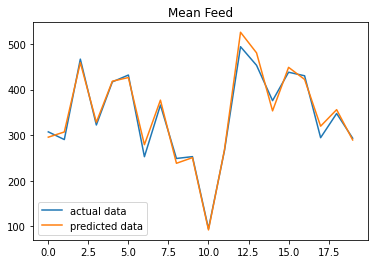

In [ ]:

plt.plot(ytest[140:160,0], label="actual data")
plt.plot(yhat[140:160,0], label="predicted data")
plt.title("Mean Feed")
plt.legend()
plt.show()

In [ ]:
plt.plot(ytest[:,1], label="actual data")
plt.plot(yhat[:,2], label="predicted data")
plt.title("Mean Feed")
plt.legend()
plt.show()

In [ ]:
model = reg.export_model()
model.summary()
yhat=model.predict(x)
#yhat = search.predict(xtest)
mae = mean_absolute_error(y, yhat)
print(mae)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                320       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 32)                0     

In [ ]:
print(yhat.shape)
print(y.shape)

print(type(yhat))
print(type(y))

arrays = np.empty((31719,2))

print(yhat[100, 0])


for i in range(31719):
  arrays[i, 0] = y[i, 0];
  arrays[i, 1] = yhat[i, 0];

print(arrays[100, 1])
print(arrays.shape)



(31719, 1)
(31719, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
188.71158
188.71157836914062
(31719, 2)


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('mean_feed').sheet1

cell_list = worksheet.range('D2:D31720')

ind = 0
for cell in cell_list:
  cell.value =arrays[ind, 0]
  ind +=1

worksheet.update_cells(cell_list)


cell_lists = worksheet.range('E2:E31720')

ind = 0
for cell in cell_lists:
  cell.value =arrays[ind, 1]
  ind +=1

worksheet.update_cells(cell_lists)

{'spreadsheetId': '1P9RgGTZYWZkdykLouWmX7Q1CHhUq1_3khp4Fo2tJ4fk',
 'updatedCells': 31719,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!E2:E31720',
 'updatedRows': 31719}

In [ ]:
print(x.shape)

x2 = x[:,0:6]
print(x2.shape)
print(x2[0,0])
print(x[0,0])

x2[:,5] = arrays[:,1]

print(x2.shape)
print(x2[0,5])
print(y.shape)
print(y[0,0])
y2=df[['Total Energy']]
y2 = np.array(y2)

print(y2[0,0])
print(y2.shape)


(31719, 9)
(31719, 6)
-0.8907057497166365
-0.8907057497166365
(31719, 6)
423.2024230957031
(31719, 1)
389.5712440363639
48.32343596799942
(31719, 1)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x2, y2, test_size=0.01, random_state=1)


In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytest.shape)

(31401, 6)
(318, 6)
(318, 1)


In [ ]:
input_node = ak.StructuredDataInput()
output_node = ak.DenseBlock()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node) 
  
output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=40, overwrite=True
)
reg.fit(xtrain, ytrain, epochs=50)

In [ ]:
model = reg.export_model()
model.summary()
yhat=model.predict(xtest)
#yhat = search.predict(xtest)
mae = mean_absolute_error(ytest, yhat)
print(mae)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                224       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 32)                0     

In [ ]:
print(yhat.shape)
print(ytest.shape)

print(type(yhat))
print(type(ytest))

arrays = np.empty((318,2))

print(yhat[100, 0])


for i in range(318):
  arrays[i, 0] = ytest[i, 0];
  arrays[i, 1] = yhat[i, 0];

print(arrays[100, 1])


(318, 1)
(318, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
102.0828
102.08280181884766


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('total Energy').sheet1

cell_list = worksheet.range('A2:A319')

ind = 0
for cell in cell_list:
  cell.value =arrays[ind, 0]
  ind +=1

worksheet.update_cells(cell_list)


cell_lists = worksheet.range('B2:B319')

ind = 0
for cell in cell_lists:
  cell.value =arrays[ind, 1]
  ind +=1

worksheet.update_cells(cell_lists)

{'spreadsheetId': '1XCLzH3USaF2zSa0hCqPR0wx7eFnDYv60v7ledTfeQEc',
 'updatedCells': 318,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!B2:B319',
 'updatedRows': 318}

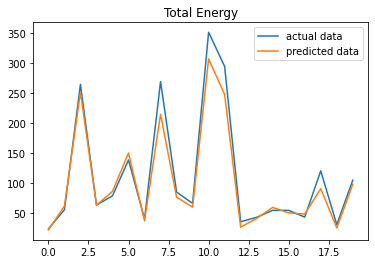

In [ ]:
plt.plot(ytest[120:140,0], label="actual data")
plt.plot(yhat[120:140,0], label="predicted data")
plt.title("Total Energy")
plt.legend()
plt.show()